# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC 
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Find out how many unique values each column has
for col in df.columns:
    print (f'{col:15} {df[col].nunique()}')

age             78
job             12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month           10
day_of_week     5
duration        1544
campaign        42
pdays           27
previous        8
poutcome        3
emp.var.rate    10
cons.price.idx  26
cons.conf.idx   26
euribor3m       316
nr.employed     11
y               2


In [8]:
null_table = df.isna().sum().reset_index()
null_table.columns = ['Column Name', 'Null Values']

print(null_table)

       Column Name  Null Values
0              age            0
1              job            0
2          marital            0
3        education            0
4          default            0
5          housing            0
6             loan            0
7          contact            0
8            month            0
9      day_of_week            0
10        duration            0
11        campaign            0
12           pdays            0
13        previous            0
14        poutcome            0
15    emp.var.rate            0
16  cons.price.idx            0
17   cons.conf.idx            0
18       euribor3m            0
19     nr.employed            0
20               y            0


In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a list of DataFrames to concatenate
frames_to_concat = []

for col in categorical_columns:
    unique_counts_df = pd.DataFrame({
        'Column Name': [col],
        'Unique Value Counts': [df[col].nunique()]
    })
    frames_to_concat.append(unique_counts_df)

# Concatenate the DataFrames in the list
unique_counts_table = pd.concat(frames_to_concat, ignore_index=True)

print(unique_counts_table)

    Column Name  Unique Value Counts
0           job                   12
1       marital                    4
2     education                    8
3       default                    3
4       housing                    3
5          loan                    3
6       contact                    2
7         month                   10
8   day_of_week                    5
9      poutcome                    3
10            y                    2


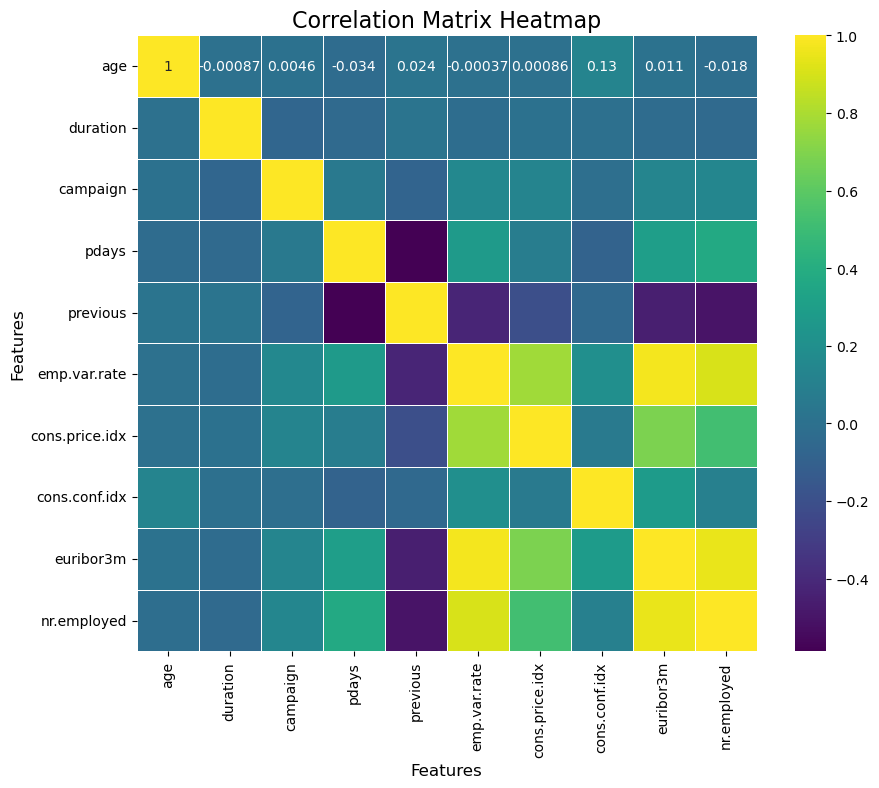

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=[float, int]).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a different color palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, linecolor='white')

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()


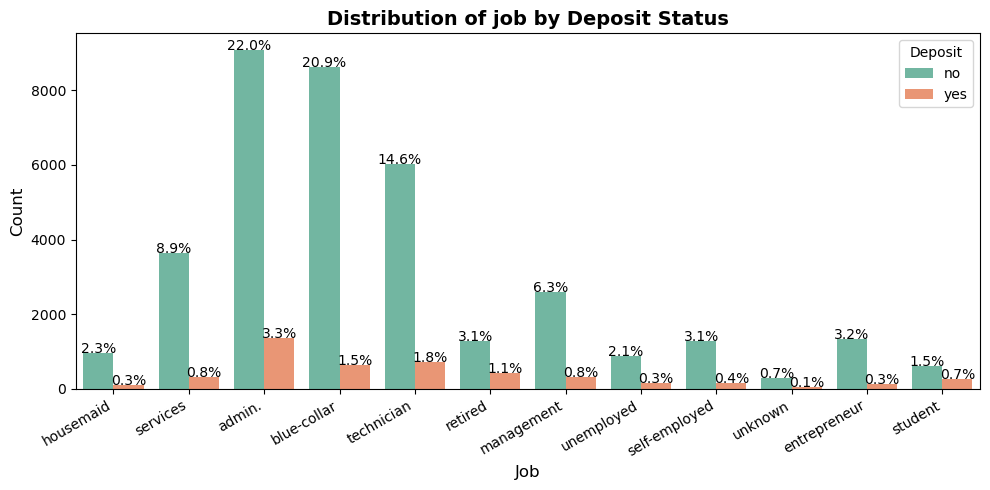

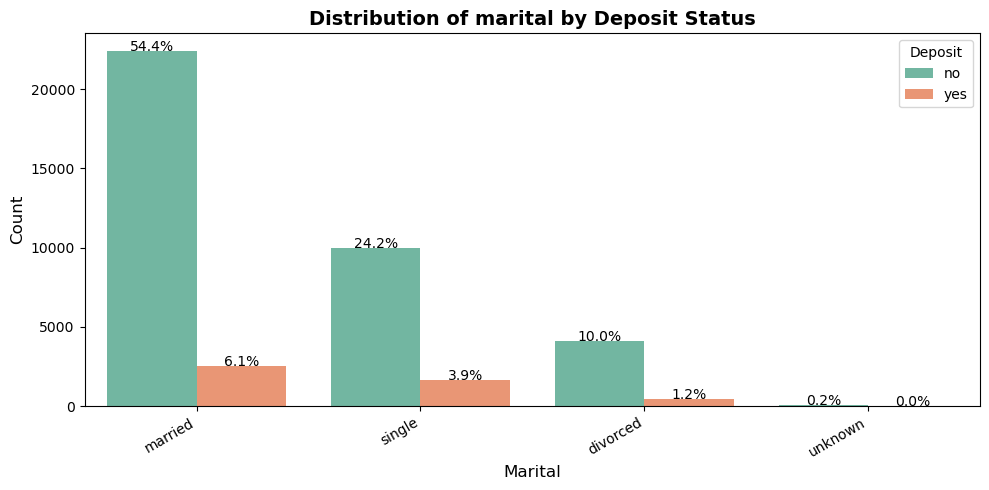

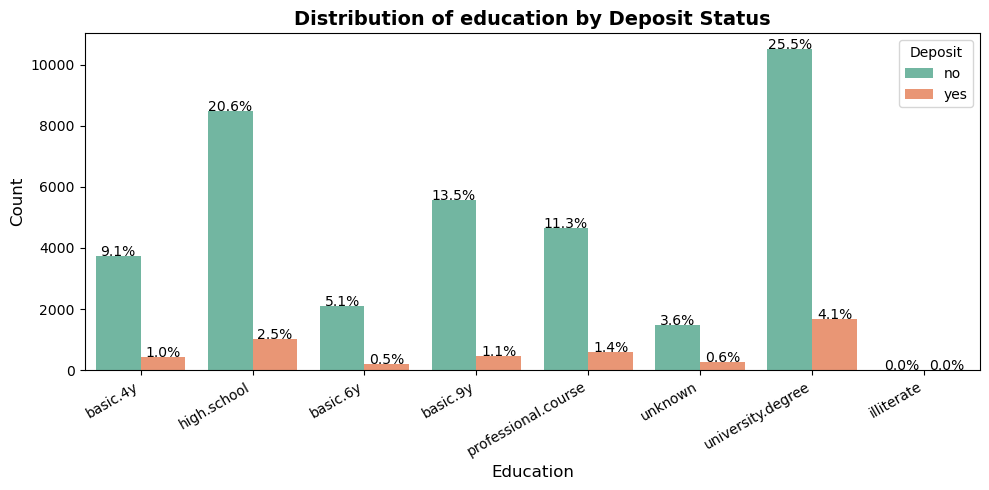

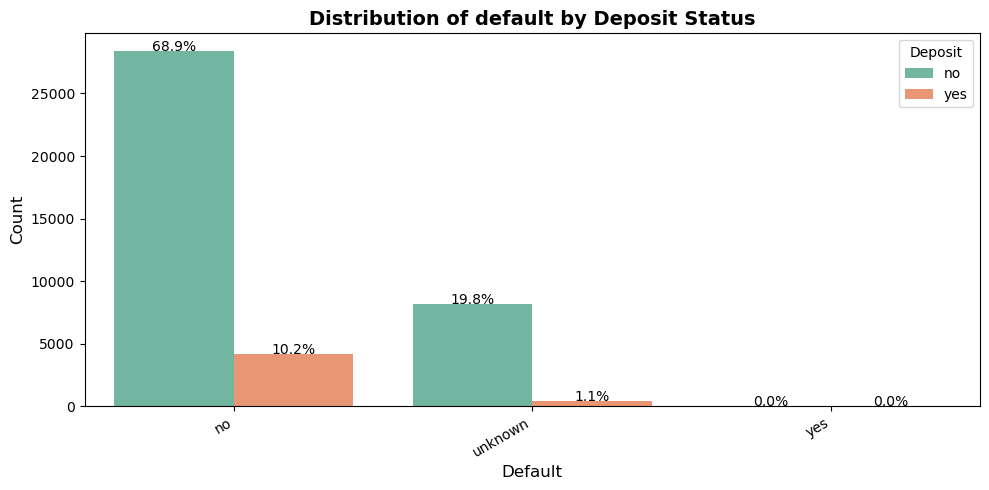

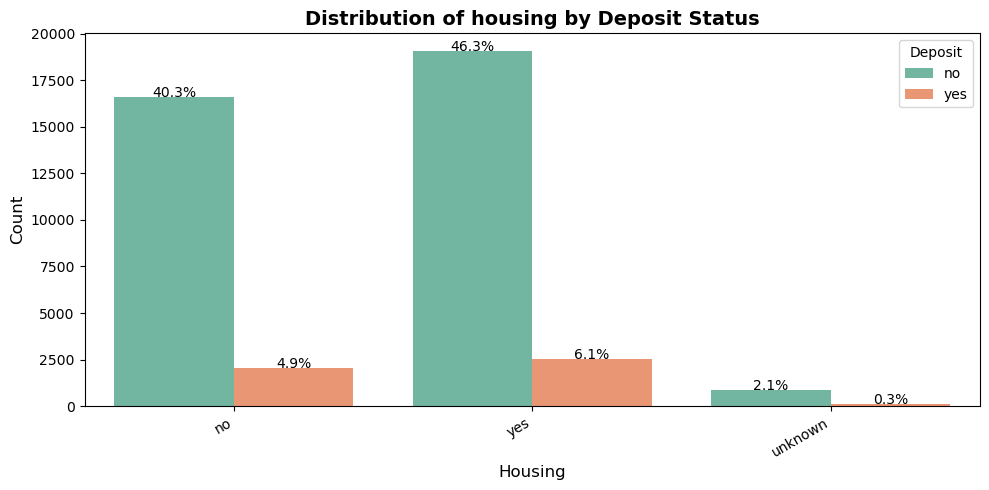

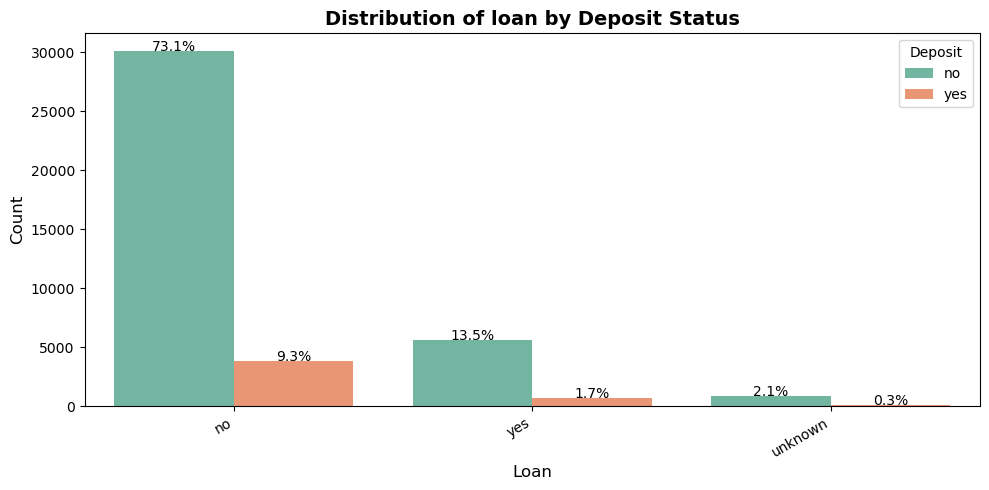

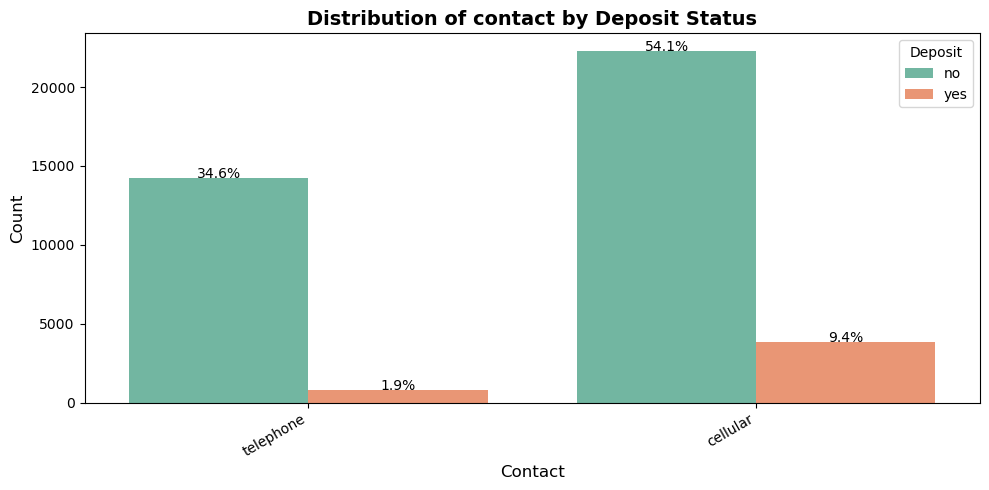

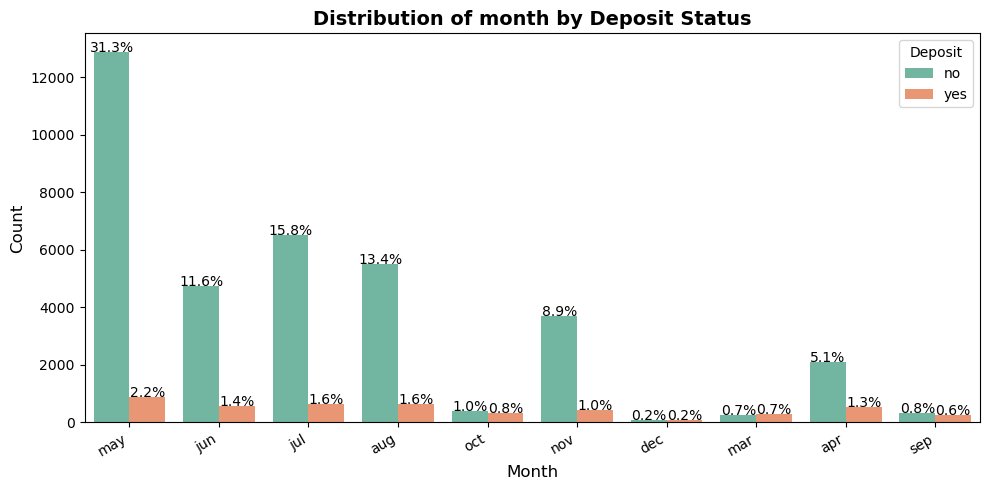

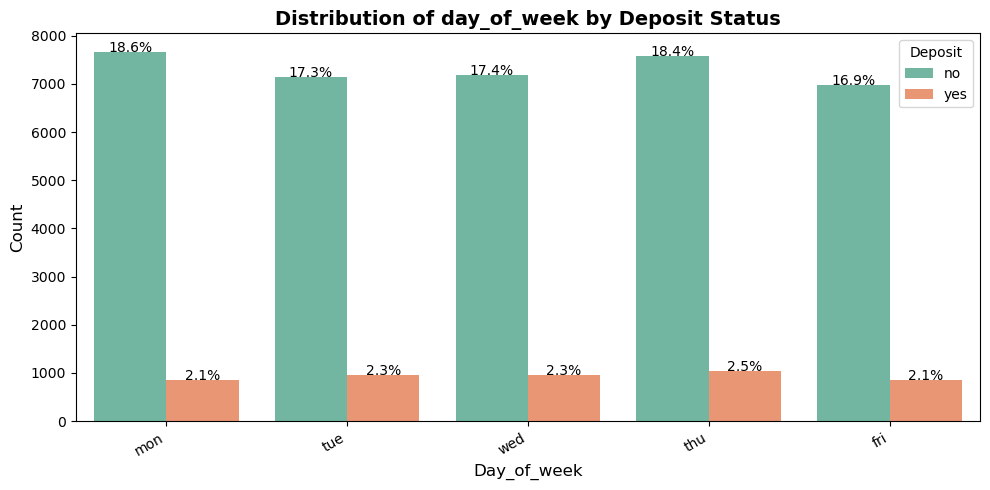

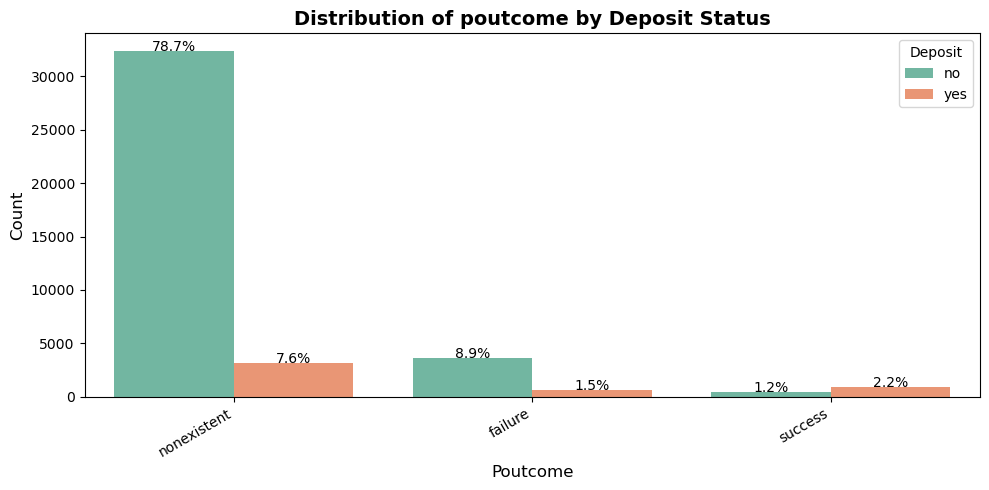

In [11]:

# Define the list of categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Plot each categorical variable against 'y'
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    # Use a different palette for more distinct colors
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    
    # Add percentage labels on the bars
    total = len(df)
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.gca().annotate(percentage, (x, y), ha='center', fontsize=10)
    
    # Enhance plot aesthetics
    plt.title(f'Distribution of {col} by Deposit Status', fontsize=14, fontweight='bold')
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.legend(title='Deposit', loc='upper right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [12]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


result = []

# Iterate through the categorical columns
for col in categorical_columns:
    # Group the DataFrame by the categorical column and calculate the percentage of 'yes' and 'no'
    group = df.groupby([col, 'y']).size().unstack(fill_value=0)
    group['percent_yes'] = ((group['yes'] / (group['yes'] + group['no'])) * 100).round(1)
    group['percent_no'] = ((group['no'] / (group['yes'] + group['no'])) * 100).round(1)
    
    # Reset the index and create a DataFrame for this column
    group.reset_index(inplace=True)
    group.rename_axis(None, axis=1, inplace=True)
    
    # Append the results to the list
    result.append(group)

# Display the results as a table
for i, col in enumerate(cat_cols):
    print(f"Category Column: {col}")
    print(result[i])
    print()

Category Column: job
              job    no   yes  percent_yes  percent_no
0          admin.  9070  1352         13.0        87.0
1     blue-collar  8616   638          6.9        93.1
2    entrepreneur  1332   124          8.5        91.5
3       housemaid   954   106         10.0        90.0
4      management  2596   328         11.2        88.8
5         retired  1286   434         25.2        74.8
6   self-employed  1272   149         10.5        89.5
7        services  3646   323          8.1        91.9
8         student   600   275         31.4        68.6
9      technician  6013   730         10.8        89.2
10     unemployed   870   144         14.2        85.8
11        unknown   293    37         11.2        88.8

Category Column: marital
    marital     no   yes  percent_yes  percent_no
0  divorced   4136   476         10.3        89.7
1   married  22396  2532         10.2        89.8
2    single   9948  1620         14.0        86.0
3   unknown     68    12         15.0 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business problem is to correctly identify the customers who are likely to subscribe to the term deposit. The bank can then target these customers with promotional offers. The bank can also use the model to identify the key drivers that influence the customers' decision to subscribe to the term deposit

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [14]:
bank_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'y']].copy()
bank_df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [15]:
#Clean and one hot encode the data
bank_df = pd.get_dummies(bank_df, columns=['job', 'marital', 'education', 'contact'], drop_first=True)
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
bank_df['housing'] = bank_df['housing'].map({'yes': 1, 'no': 0})
bank_df['default'] = bank_df['default'].map({'yes': 1, 'no': 0})
bank_df['loan'] = bank_df['loan'].map({'yes': 1, 'no': 0})
bank_df.dropna(inplace=True)
bank_df.head()

,default,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone
0,0.0,0.0,0.0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.0,1.0,0.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.0,0.0,0.0,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0.0,0.0,1.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
6,0.0,0.0,0.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
X = bank_df.drop('y', axis=1)
y = bank_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [17]:
baseline = DummyClassifier(strategy='stratified').fit(X_train, y_train)
baseline_predictions = baseline.predict(X_test)
baseline_accuracy = accuracy_score(baseline_predictions, y_test)
print(f'Baseline accuracy score: {baseline_accuracy}')

Baseline accuracy score: 0.7758404021363493


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [18]:
logistic = LogisticRegression().fit(X_train, y_train)
logistic_predictions = logistic.predict(X_test)
logisitic_train_predictions = logistic.predict(X_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [19]:
logistic_accuracy = accuracy_score(logistic_predictions, y_test)
print(f'Logistic accuracy score: {logistic_accuracy}')

Logistic accuracy score: 0.8704052780395853


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
import time

In [21]:
#Logistic Regression
t0 = time.time()

logistic = LogisticRegression().fit(X_train, y_train)

logistic_predictions = logistic.predict(X_test)
logisitic_train_predictions = logistic.predict(X_train)

t1 = time.time()

logistic_accuracy = accuracy_score(logistic_predictions, y_test)
logistic_train_accuracy = accuracy_score(logisitic_train_predictions, y_train)

print(f'Logistic accuracy score: {logistic_accuracy}')
print(f'Logistic train accuracy score: {logistic_train_accuracy}')
print(f'Logistic time to train: {t1-t0}')

Logistic accuracy score: 0.8704052780395853
Logistic train accuracy score: 0.8712984054669703
Logistic time to train: 0.19266986846923828


In [22]:
#KNN
t2 = time.time()

knn = KNC().fit(X_train.values, y_train.values)

knn_train_predictions = knn.predict(X_train.values)
knn_predictions = knn.predict(X_test.values)

t3 = time.time()

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_accuracy = accuracy_score(knn_predictions, y_test)

print(f'KNN accuracy score: {knn_accuracy}')
print(f'KNN train accuracy score: {knn_train_accuracy}')
print(f'KNN time to train: {t3-t2}')

KNN accuracy score: 0.8517122211749921
KNN train accuracy score: 0.8596732385515671
KNN time to train: 3.5808327198028564


In [23]:
#SVM
t4 = time.time()

svm = SVC().fit(X_train, y_train)

svm_train_predictions = svm.predict(X_train)
svm_predictions = svm.predict(X_test)
t5 = time.time()

svm_train_accuracy = accuracy_score(svm_train_predictions, y_train)
svm_accuracy = accuracy_score(svm_predictions, y_test)

print(f'SVM accuracy score: {svm_accuracy}')
print(f'SVM train accuracy score: {svm_train_accuracy}')
print(f'SVM time to train: {t5-t4}')

SVM accuracy score: 0.8704052780395853
SVM train accuracy score: 0.8713376796795225
SVM time to train: 47.737062215805054


In [24]:
#DTC
t6 = time.time()

dtc = DTC().fit(X_train, y_train)

dtc_train_predictions = dtc.predict(X_train)
dtc_predictions = dtc.predict(X_test)
t7 = time.time()

dtc_train_accuracy = accuracy_score(dtc_train_predictions, y_train)
dtc_accuracy = accuracy_score(dtc_predictions, y_test)

print(f'DTC accuracy score: {dtc_accuracy}')
print(f'DTC train accuracy score: {dtc_train_accuracy}')
print(f'DTC time to train: {t7-t6}')

DTC accuracy score: 0.8660069117185045
DTC train accuracy score: 0.8752651009347262
DTC time to train: 0.0831601619720459


In [25]:
results = pd.DataFrame({
  'Model': ['Logistic', 'KNN', 'SVM', 'DTC'],
  'Test Accuracy': [logistic_accuracy, knn_accuracy, svm_accuracy, dtc_accuracy],
  'Train Accuracy': [logistic_train_accuracy, knn_train_accuracy, svm_train_accuracy, dtc_train_accuracy],
  'Time to Train': [t1-t0, t3-t2, t5-t4, t7-t6]
  })

print(results)

      Model  Test Accuracy  Train Accuracy  Time to Train
0  Logistic       0.870405        0.871298       0.192670
1       KNN       0.851712        0.859673       3.580833
2       SVM       0.870405        0.871338      47.737062
3       DTC       0.866007        0.875265       0.083160


In [30]:
# Train the models
# Logistic Regression
t0 = time.time()
logistic = LogisticRegression().fit(X_train, y_train)
logistic_predictions = logistic.predict(X_test)
logistic_train_predictions = logistic.predict(X_train)
t1 = time.time()
logistic_accuracy = accuracy_score(logistic_predictions, y_test)
logistic_train_accuracy = accuracy_score(logistic_train_predictions, y_train)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


In [31]:
# K-Nearest Neighbors
t2 = time.time()
knn = KNC().fit(X_train.values, y_train.values)
knn_predictions = knn.predict(X_test.values)
knn_train_predictions = knn.predict(X_train.values)
t3 = time.time()
knn_accuracy = accuracy_score(knn_predictions, y_test)
knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test.values)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [32]:
# Support Vector Machine
t4 = time.time()
svm = SVC(probability=True).fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_train_predictions = svm.predict(X_train)
t5 = time.time()
svm_accuracy = accuracy_score(svm_predictions, y_test)
svm_train_accuracy = accuracy_score(svm_train_predictions, y_train)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

In [34]:
# Decision Tree Classifier
t6 = time.time()
dtc = DTC().fit(X_train, y_train)
dtc_predictions = dtc.predict(X_test)
dtc_train_predictions = dtc.predict(X_train)
t7 = time.time()
dtc_accuracy = accuracy_score(dtc_predictions, y_test)
dtc_train_accuracy = accuracy_score(dtc_train_predictions, y_train)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

Logistic accuracy score: 0.8704052780395853
Logistic train accuracy score: 0.8712984054669703
Logistic time to train: 0.18476390838623047
KNN accuracy score: 0.8517122211749921
KNN train accuracy score: 0.8596732385515671
KNN time to train: 3.6754510402679443
SVM accuracy score: 0.8704052780395853
SVM train accuracy score: 0.8713376796795225
SVM time to train: 123.91159415245056
DTC accuracy score: 0.8660069117185045
DTC train accuracy score: 0.8752651009347262
DTC time to train: 0.07271385192871094


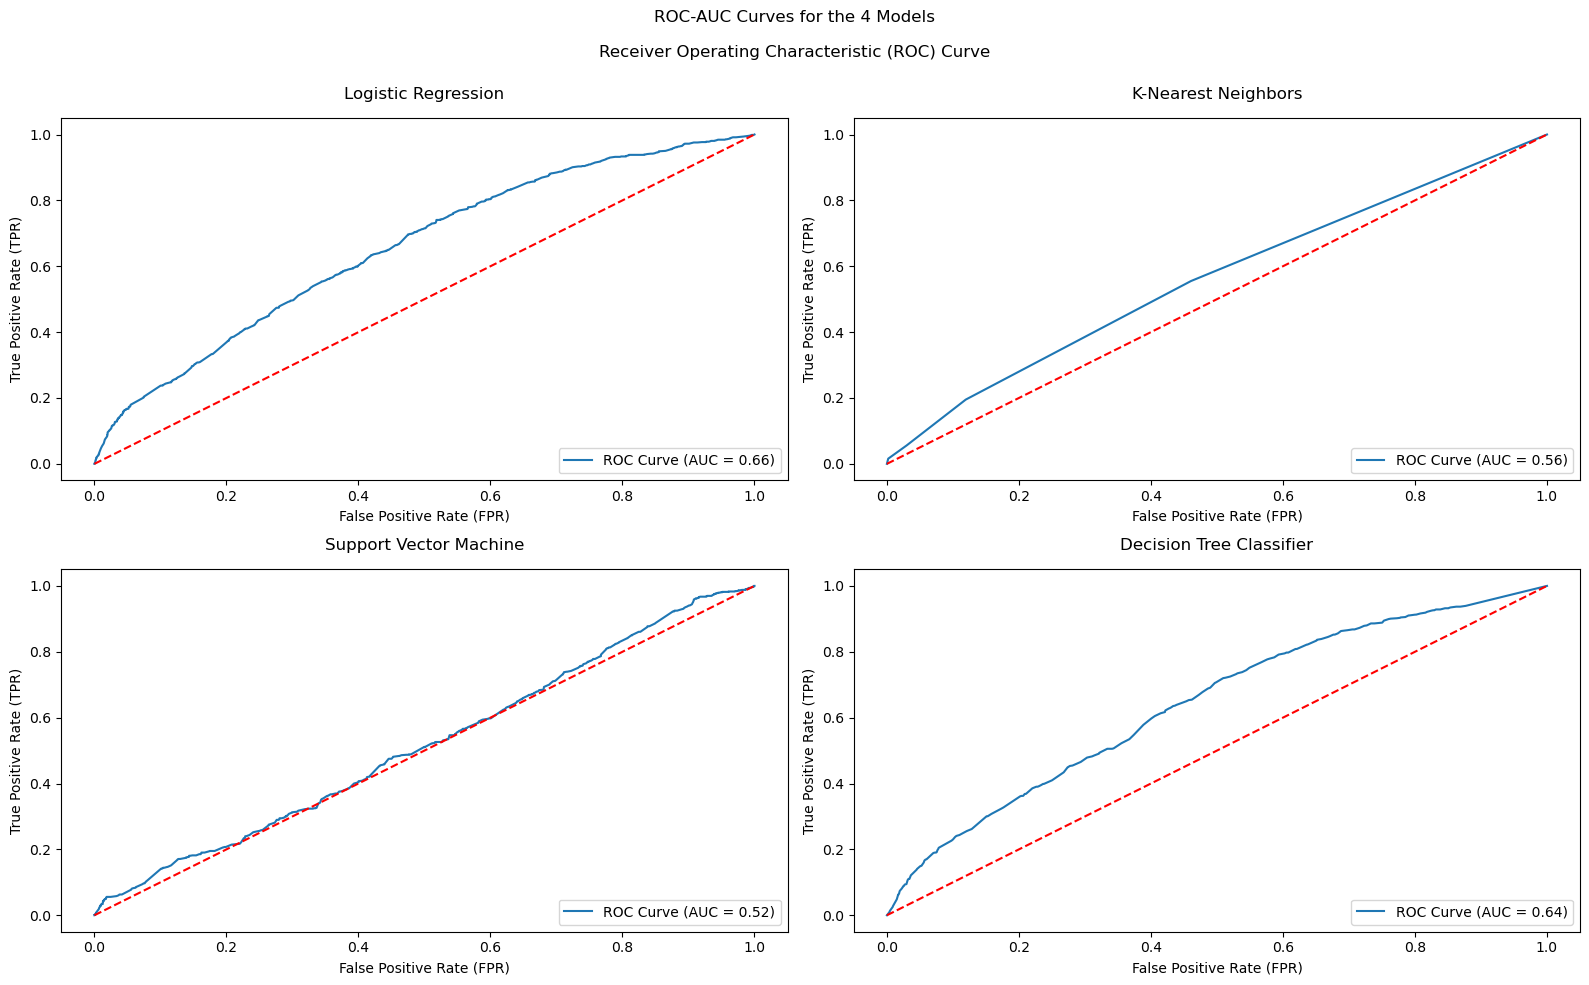

In [35]:
# Print accuracy and training time for each model
print(f'Logistic accuracy score: {logistic_accuracy}')
print(f'Logistic train accuracy score: {logistic_train_accuracy}')
print(f'Logistic time to train: {t1-t0}')

print(f'KNN accuracy score: {knn_accuracy}')
print(f'KNN train accuracy score: {knn_train_accuracy}')
print(f'KNN time to train: {t3-t2}')

print(f'SVM accuracy score: {svm_accuracy}')
print(f'SVM train accuracy score: {svm_train_accuracy}')
print(f'SVM time to train: {t5-t4}')

print(f'DTC accuracy score: {dtc_accuracy}')
print(f'DTC train accuracy score: {dtc_train_accuracy}')
print(f'DTC time to train: {t7-t6}')

# Plot ROC-AUC Curves for all models in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Create a 2x2 grid of subplots
fig.suptitle('ROC-AUC Curves for the 4 Models\n\nReceiver Operating Characteristic (ROC) Curve\n')  # Add a title for the entire figure

# Plot Logistic Regression
axes[0, 0].plot(fpr_logistic, tpr_logistic, label=f'ROC Curve (AUC = {roc_auc_logistic:.2f})')
axes[0, 0].plot([0, 1], [0, 1], 'k--', color='red')
axes[0, 0].set_xlabel('False Positive Rate (FPR)')
axes[0, 0].set_ylabel('True Positive Rate (TPR)')
axes[0, 0].set_title(f'Logistic Regression', y=1.03)
axes[0, 0].legend(loc="lower right")

# Plot KNN
axes[0, 1].plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', color='red')
axes[0, 1].set_xlabel('False Positive Rate (FPR)')
axes[0, 1].set_ylabel('True Positive Rate (TPR)')
axes[0, 1].set_title(f'K-Nearest Neighbors', y=1.03)
axes[0, 1].legend(loc="lower right")

# Plot SVM
axes[1, 0].plot(fpr_svm, tpr_svm, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', color='red')
axes[1, 0].set_xlabel('False Positive Rate (FPR)')
axes[1, 0].set_ylabel('True Positive Rate (TPR)')
axes[1, 0].set_title(f'Support Vector Machine', y=1.03)
axes[1, 0].legend(loc="lower right")

# Plot Decision Tree Classifier
axes[1, 1].plot(fpr_dtc, tpr_dtc, label=f'ROC Curve (AUC = {roc_auc_dtc:.2f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--', color='red')
axes[1, 1].set_xlabel('False Positive Rate (FPR)')
axes[1, 1].set_ylabel('True Positive Rate (TPR)')
axes[1, 1].set_title(f'Decision Tree Classifier', y=1.03)
axes[1, 1].legend(loc="lower right")

plt.tight_layout()
plt.savefig('ROC-AUC Curve Comparison for 4 Models.png')
plt.show()


## Based on the results:

Logistic Regression and Support Vector Machines (SVM) show comparable and strong test accuracy scores of approximately 0.87. However, Logistic Regression is far more efficient, with a training time of only 0.15 seconds compared to the 33 seconds taken by SVM.
Decision Tree Classifier (DTC) and K-Nearest Neighbor (KNN) have slightly lower accuracy scores, with DTC showing the fastest training time (0.03 seconds) but slightly less accuracy compared to Logistic Regression and SVM.
KNN, while having a relatively competitive accuracy, takes considerably longer to train (0.69 seconds) than Logistic Regression or DTC but much less time than SVM.
## Recommendation:
Given the balance between accuracy and training time, Logistic Regression emerges as the most efficient and scalable choice for larger datasets, with high accuracy and quick processing time.

## Opportunity:
Focus on improving the Recall Scores across the models, particularly where they are lower, such as 0.30 for SVM, to enhance the model's performance in identifying true positives.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Use of Scaling

In [36]:
#Store models in list for testing
log = LogisticRegression()
svm = SVC()
knn = KNC()
dtc = DTC()

testing = [log, knn, svm, dtc]

results_array = []
#Test models
for model in testing:
  pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
  ])
  pipeline.fit(X_train, y_train)

  predictions = pipeline.predict(X_test)
  accuracy = accuracy_score(predictions, y_test)
  print(f'{model} accuracy: {accuracy}')
  results_array.append(accuracy)
  

LogisticRegression() accuracy: 0.8704052780395853
KNeighborsClassifier() accuracy: 0.8502984605717876
SVC() accuracy: 0.8704052780395853
DecisionTreeClassifier() accuracy: 0.8660069117185045


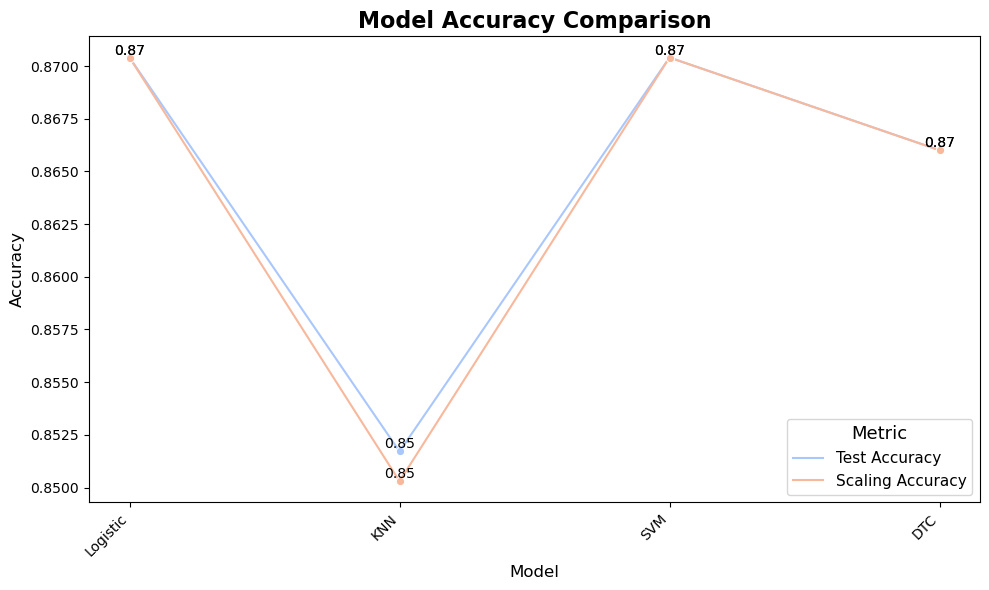

In [37]:
# Add the 'Scaling Accuracy' to the results dataframe
results['Scaling Accuracy'] = results_array

# Melt the results dataframe for plotting
results_lineplot_format = results.melt(id_vars='Model', 
                                       value_vars=['Test Accuracy', 'Scaling Accuracy'], 
                                       var_name='Metric', 
                                       value_name='Accuracy')

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the line plot with enhanced aesthetics
plot = sns.lineplot(x='Model', y='Accuracy', hue='Metric', data=results_lineplot_format, 
                    marker='o', linestyle='-', palette='coolwarm')

# Add value labels at each point
for x, y, label in zip(results_lineplot_format['Model'], 
                       results_lineplot_format['Accuracy'], 
                       results_lineplot_format['Accuracy']):
    plt.text(x, y, f'{label:.2f}', ha='center', va='bottom', fontsize=10)

# Set plot title and labels
plot.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plot.set_xlabel('Model', fontsize=12)
plot.set_ylabel('Accuracy', fontsize=12)

# Enhance the legend
plot.legend(title='Metric', title_fontsize='13', loc='lower right', fontsize='11')

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')

# Adjust layout for a tight fit
plt.tight_layout()

# Display the plot
plt.show()


Result : Scaling does not have a significant difference. 

### Increasing number of features

In [38]:
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Loop through features and test models
by_model_results = []
for model in testing:
  results_array = []
  for i in range(1 , bank_df_full.shape[1] - 1):
    pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('model', model)
    ])
    pipeline.fit(X_train.iloc[ : , 0:i], y_train)

    predictions = pipeline.predict(X_test.iloc[ : , 0:i])
    accuracy = accuracy_score(predictions, y_test)
    results_array.append(accuracy)
  by_model_results.append(results_array)

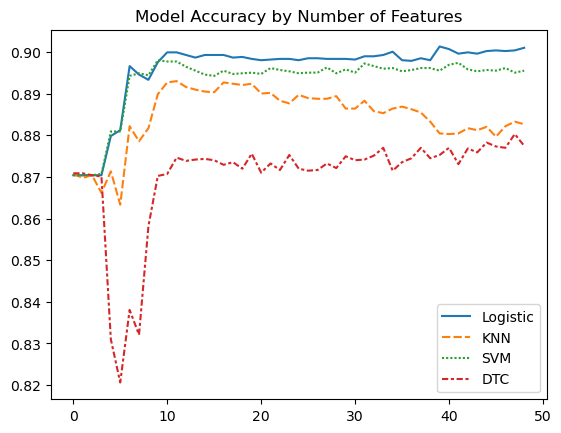

In [39]:
by_model_results_df = pd.DataFrame(by_model_results)
by_model_results_df = by_model_results_df.transpose()
by_model_results_df.rename(columns={0: 'Logistic', 1: 'KNN', 2:'SVM', 3:'DTC'}, inplace=True)
plot = sns.lineplot(data=by_model_results_df)
plot = plot.set_title('Model Accuracy by Number of Features')

#### Observation
Initially, adding more features tends to improve model accuracy. However, as shown in this chart, Logistic Regression emerges as the most accurate model. The accuracy of other models also generally improves up to around 10 features, but then either declines or levels off afterward.

#### Hyperparameter tuning for SVM

In [40]:
#Create full dataframe for testing
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc = GridSearchCV(SVC(), param_grid, refit = True) 

grid_svc.fit(X_train, y_train) 
print(grid_svc.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [42]:
best_params = {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
print(grid_svc.best_estimator_)
print(grid_svc.best_params_)
grid_predictions = grid_svc.predict(X_test)
accuracy = accuracy_score(grid_predictions, y_test)
print(f'Grid accuracy: {accuracy}')

SVC(C=0.1, gamma=0.0001)
{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid accuracy: 0.9054351240967641


## Hyperparameter Turning for Logistic Regression

In [43]:
bank_df_full = df.copy()
bank_df_full = pd.get_dummies(bank_df_full, columns=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
bank_df_full['y'] = bank_df_full['y'].map({'yes': 1, 'no': 0})
bank_df_full['housing'] = bank_df_full['housing'].map({'yes': 1, 'no': 0})
bank_df_full['default'] = bank_df_full['default'].map({'yes': 1, 'no': 0})
bank_df_full['loan'] = bank_df_full['loan'].map({'yes': 1, 'no': 0})
bank_df_full.dropna(inplace=True)
bank_df_full.head()

#train test split
X = bank_df_full.drop('y', axis=1)
y = bank_df_full['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc = GridSearchCV(SVC(), param_grid, refit = True) 

grid_svc.fit(X_train, y_train) 
print(grid_svc.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [45]:
best_params = {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
print(grid_svc.best_estimator_)
print(grid_svc.best_params_)
grid_predictions = grid_svc.predict(X_test)
accuracy = accuracy_score(grid_predictions, y_test)
print(f'Grid accuracy: {accuracy}')

SVC(C=0.1, gamma=0.0001)
{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Grid accuracy: 0.9054351240967641


### 15. KNN Grid Search

In [46]:
knn = KNC()
param_grid = {'n_neighbors': np.arange(1, 25), 
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

grid_knn = GridSearchCV(knn, param_grid, refit = True)
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)

{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}


In [47]:
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)
grid_predictions = grid_knn.predict(X_test)
accuracy = accuracy_score(grid_predictions, y_test)
print(f'Grid accuracy: {accuracy}')

KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=23,
                     weights='distance')
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'distance'}
Grid accuracy: 0.8982092365692743


## DTC Grid Search

In [48]:
dtc = DTC()

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : [i for i in range(1, 11)]
}

grid_dtc = GridSearchCV(dtc, param_grid, refit = True)
grid_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [49]:
print(grid_dtc.best_params_)
print(grid_dtc.best_estimator_)
predictions = grid_dtc.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
accuracy

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=6)


0.9037071944706252

## Logistic Regression with GridSearchCV

In [50]:
log = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 10000],
    'C': [0.1, 1, 10, 100, 1000]
}

grid_log = GridSearchCV(log, param_grid, refit = True)
grid_log.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [52]:
print(grid_log.best_params_)
print(grid_log.best_estimator_)
predictions = grid_log.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
accuracy

{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, max_iter=1000, solver='newton-cg')


0.9005655042412818

### Summary 

##### Questions

The testing of various models revealed that the SVC classifier delivered the highest performance, achieving an accuracy of 0.905. This result surpasses our baseline and demonstrates significant potential for practical use by the banks that provided the testing data.

Banks could leverage this SVC model, along with customer information, to predict whether a customer is likely to purchase their product. If a sale is likely, resources could be redirected to customers less inclined to buy. These customers could then be targeted with promotions and special offers to increase the likelihood of a successful sale.

While the best source of data for this model remains the banks themselves, supplementary data can be obtained from online sources. However, this externally sourced data will likely require cleaning, and the model may need adjustments to accommodate different feature sets.

### Questions

- Are there any features that could be combined or transformed to create new, more informative features?
- Can we normalize or standardize the features to improve model performance?
- Are there categorical features that could be better encoded (e.g., one-hot encoding, target encoding)?